# SPHERICAL CNNS ON UNSTRUCTURED GRIDS


# 关于非结构网格的球形CNNS

### ABSTRACT


We present an efficient convolution kernel for Convolutional Neural Networks
(CNNs) on unstructured grids using **parameterized differential operators** while focusing
on spherical signals such as **panorama images** or **planetary signals**. To
this end, we replace conventional convolution kernels with linear combinations of
differential operators that are weighted by learnable parameters. Differential operators
can be efficiently estimated on unstructured grids using one-ring neighbors,
and learnable parameters can be optimized through standard back-propagation.
As a result, we obtain extremely efficient neural networks that match or outperform
**state-of-the-art** network architectures in terms of performance but with a
significantly smaller number of network parameters. We evaluate our algorithm
in an extensive series of experiments on a variety of computer vision and climate
science tasks, including shape classification, climate pattern segmentation, and
**omnidirectional** image semantic segmentation. Overall, we 

(1) present a novel CNN approach on unstructured grids using parameterized differential operators for spherical signals

(2) show that our unique kernel **parameterization** allow our model to achieve the same or higher accuracy with significantly fewer network
parameters.

 parameterized differential operators 参数化的微分算子
 
 panorama images 全景图像
 
planetary signals. 行星的信号

state-of-the-art 最先进的

omnidirectional 全向

parameterization 参数

我们使用参数化微分算子为非结构化网格上的卷积神经网络（CNN）提供了一个高效的卷积核，同时关注球形信号，如全景图像或行星信号。

为此，我们用可学习参数加权的微分算子的线性组合代替传统的卷积核。

可以使用单环邻居在非结构化网格上有效地估计差分运算符，并且可以通过标准反向传播来优化可学习的参数。

因此，我们获得了极其高效的神经网络，在性能方面匹配或优于最先进的网络架构，但网络参数数量明显减少。

我们在各种计算机视觉和气候科学任务的广泛系列实验中评估我们的算法，包括形状分类，气候模式分割和全方位图像语义分割。总的来说，我们

（1）利用球形信号的参数化微分算子，对非结构网格提出了一种新颖的CNN方法

（2）表明我们独特的内核参数化允许我们的模型以更少的网络参数实现相同或更高的精度。

### introduction

A wide range of machine learning problems in computer vision and related areas require processing
signals in the spherical domain; for instance, omnidirectional RGBD images from commercially
available **panorama cameras**, such as Matterport (Chang et al., 2017), panaramic videos coupled
with LIDAR scans from self-driving cars (Geiger et al., 2013), or planetary signals in scientific
domains such as climate science (Racah et al., 2017). Unfortunately, naively mapping spherical
signals to **planar** domains results in undesirable **distortions**. Specifically, projection artifacts near
polar regions and handling of boundaries makes learning with 2D convolutional neural networks
(CNNs) particularly challenging and inefficient. Very recent work, such as Cohen et al. (2018) and
Esteves et al. (2018), propose network architectures that operate natively in the spherical domain,
and are invariant to rotations in the SO(3) group. Such invariances are desirable in a set of problems
– e.g., machine learning problems of molecules – where gravitational effects are negligible and
orientation is arbitrary. However, for other different classes of problems **at large**, assumed orientation
information is crucial to the predictive capability of the network. A good example of such problems
is the MNIST digit recognition problem, where orientation plays an important role in distinguishing
digits “6” and “9”. Other examples include omnidirectional images, where images are naturally
oriented by gravity; and planetary signals, where planets are naturally oriented by their axis of
rotation.

<p>panorama cameras 全景相机
<p>planar 平面
    
distortions 失真

at large 广泛地

计算机视觉和相关领域中的各种机器学习问题需要在球形域中处理信号; 例如，来自商用全景相机的全方位RGBD图像，例如Matterport（Chang等人，2017），全景视频与自动驾驶汽车的LIDAR扫描结合（Geiger等人，2013），或科学领域的行星信号 例如气候科学（Racah等，2017）。

不幸的是，将球形信号天然地映射到平面域会导致不希望的失真

具体地，极区附近的投影伪像和边界的处理使得用2D卷积神经网络（CNN）学习特别具有挑战性和低效率。

最近的工作，如科恩等人。 （2018年）和埃斯特维斯等人。 （2018），提出在球形域中本地操作的网络架构，并且对于SO（3）群中的旋转是不变的

这种不变性在一系列问题中是可取的 - 例如，分子的机器学习问题 - 其中引力效应可忽略不计，取向是任意的。

然而，对于其他不同类别的问题，选定的方向信息对于网络的预测能力是至关重要的。

这种问题的一个很好的例子是MNIST数字识别问题，其中取向在区分数字“6”和“9”中起重要作用。

其他示例包括全向图像，其中图像通过重力自然定向; 和行星信号，其中行星通过其旋转轴自然定向。

In this work, we present a new convolution kernel for CNNs on arbitrary **manifolds** and **topologies**,
**discretized** by an unstructured grid (i.e., mesh), and focus on its applications in the spherical domain
approximated by an **icosahedral spherical mesh**. We propose and evaluate the use of a new parameterization
scheme for CNN convolution kernels, which we call Parameterized Differential Operators
(PDOs), which is easy to implement on unstructured grids. We call the resulting convolution operator
that operates on the mesh using such kernels the MeshConv operator. This parameterization
scheme utilizes only 4 parameters for each kernel, and achieves significantly better performance
than competing methods, with much fewer parameters. In particular, we illustrate its use in various
machine learning problems in computer vision and climate science.

manifold 流形

topology 拓扑：在连续改变形状后，物体间位置关系仍然保持不变的性质

discretized 离散

icosahedral spherical mesh 二十面体球形网


在这项工作中，我们为任意流形和拓扑上的CNN提供了一个新的卷积核，由非结构化网格（即网格）离散化，并专注于其在由二十面体球形网格近似的球形域中的应用。

我们提出并评估了CNN卷积核的新参数化方案的使用，我们称之为参数化差分算子（PDO），它易于在非结构化网格上实现。

我们将在网格上使用这种卷积核的卷积运算符 MeshConv 运算符

此参数化方案仅为每个内核使用4个参数，并且与竞争方法相比，实现了明显更好的性能，参数更少。

特别地，我们将其用于计算机视觉和气候科学中的各种机器学习问题。

In summary, our contributions are as follows:

 We present a general approach for orientable CNNs on unstructured grids using parameterized
differential operators.

 We show that our spherical model achieves significantly higher parameter efficiency compared
to state-of-the-art network architectures for 3D classification tasks and spherical image
semantic segmentation.

 We release and open-source the codes developed and used in this study for other potential
extended applications1.


总结一下我们的贡献：

我们使用参数化微分算子在非结构化网格上提出了可定向CNN的一般方法。

我们表明，与用于3D分类任务和球形图像语义分割的最先进网络架构相比，我们的球形模型实现了显着更高的参数效率。

我们发布并开源本研究中开发和使用的代码，用于其他潜在的扩展应用1。

## background

### spherical Cnn

The first and foremost concern for processing spherical signals is distortions introduced by projecting signals on curved surfaces to ﬂat surfaces. Su & Grauman (2017) process **equirectangular** images with regular convolutions with increased kernel sizes near polar regions where greater distortions are introduced by the planar mapping. Coors et al. (2018) and Zhao et al. (2018)use a constant kernel that samples points on the tangent plane of the spherical image to reduce distortions. A slightly different line of literature explores rotational-equivariant implementations of spherical CNNs. Cohen et al. (2018) proposed spherical convolutions with intermediate feature maps in SO(3) that are rotational-equivariant. Esteves et al. (2018) used spherical harmonic basis to achieve similar results.


equirectangular 等距离长方圆柱
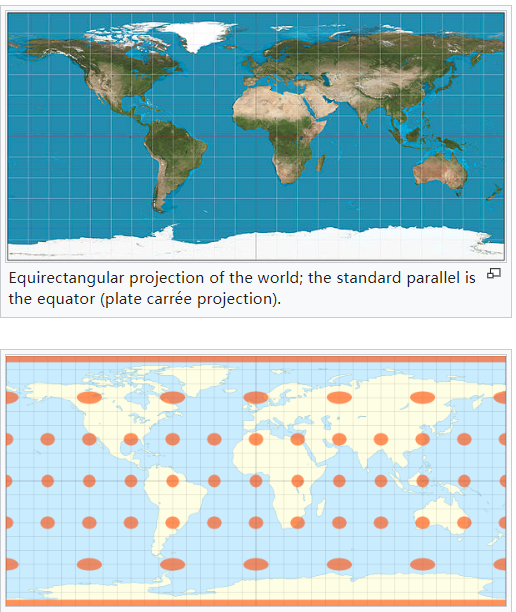
这个就是地球仪的等距离长方圆柱投影图

rotational-equivariant  旋转等变

处理球形信号的首要关注点是通过将曲面上的信号投射到表面上而引入的失真。

Su＆Grauman（2017）使用常规卷积处理等距离长方圆柱图像，在极区附近增加了核尺寸，在这些区域映射成平面会引入更大的失真。

库尔斯等人（2018年）和赵等人（2018）使用恒定的核对球形图像的切平面上的点进行采样以减少失真。

略有不同的文献探讨了球形CNN的旋转等变实现。

科恩等人（2018）提出了在SO（3）中具有旋转等变性的中间特征图的球形卷积。

Esteves等。 （2018）使用球谐函数基础来实现类似的结果。

## 重新参数化的卷积核 

Related to our approach in using parameterized differential
operators, several works utilize the **diffusion kernel** for efficient Machine Learning and CNNs.
Kondor & Lafferty (2002) was among the first to suggest the use of diffusion kernel on graphs. Atwood
& Towsley (2016) propose Diffusion-Convolutional Neural Networks (DCNN) for efficient
convolution on graph structured data. Boscaini et al. (2016) introduce a generalization of classic
CNNs to non-Euclidean domains by using a set of **oriented anisotropic** diffusion kernels. Cohen &
Welling (2016) utilized a linear combination of filter banks to acquire equivariant convolution filters. Ruthotto & Haber (2018) explore the reparameterization of convolutional kernels using **parabolic**
and **hyperbolic** differential basis with regular grid images.


diffusion kernel 扩散核

oriented anisotropic 取向各向异性

parabolic 抛物线

hyperbolic 双曲线

与我们使用参数化微分算子的方法相关，一些工作利用扩散核来实现高效的机器学习和CNN。

Kondor & Lafferty (2002)是第一批想出在图上使用扩散核的人

Atwood＆Towsley（2016）提出了扩散 - 卷积神经网络（DCNN），用于图形结构化数据的高效卷积。

 Boscaini 等将传统CNN引申到非欧几里得空间，通过使用一组取向各向异性的扩散核
 
 Cohen＆Welling（2016）利用滤波器组的线性组合来获得等变的卷积滤波器。
 
 Ruthotto＆Haber（2018）利用抛物线和双曲线微分基础与常规网格图像探索卷积核的重新参数化。

## Non-Euclidean Convolutions 非欧几里得空间卷积 

## Image Semantic Segmentation  图像语义分割